In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob as tb
import text2emotion as te

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/efeemirhandogan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/efeemirhandogan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/efeemirhandogan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# load datasets and merge on by ID
survey_data = pd.read_csv('data/CSAT_Survey_Data.csv')
age_data = pd.read_csv('data/Customer_Age_Data.csv')
mrr_data = pd.read_csv('data/Customer_MRR_Data.csv')
revenue_data = pd.read_csv('data/Customer_Revenue_Data.csv')
ticket_data = pd.read_csv('data/Help_Ticket_Data.csv')
interaction_data = pd.read_csv('data/Newsletter_Interaction_Data.csv')
bugtask_data = pd.read_csv('data/Product_Bug_Task_Data.csv')
region_data = pd.read_csv('data/RegionAndVertical_Data.csv')
status_data = pd.read_csv('data/StatusAndLevel_Data.csv')

# change column name on age data
age_data.rename(columns={'CRM ID':'Customer ID','Customer Age (Months)':'Age'}, inplace=True)

# merge all datasets
df = pd.merge(survey_data, age_data, on='Customer ID')
df = pd.merge(df, mrr_data, on='Customer ID')
df = pd.merge(df, revenue_data, on='Customer ID')
df = pd.merge(df, ticket_data, on='Customer ID')
df = pd.merge(df, interaction_data, on='Customer ID')
df = pd.merge(df, bugtask_data, on='Customer ID')
df = pd.merge(df, region_data, on='Customer ID')
df = pd.merge(df, status_data, on='Customer ID')

df.drop(columns=['Year'], inplace=True)

df.head()

,Customer ID,Quarter,Survey Date,Response Date,How likely are you to recommend insider to a friend or colleague,How would you rate the value you gain from our company,How frequently are you using our platform,Please rate the overall quality of our products,Please rate the usability of the panel,Please rate your understanding of our reporting capabilities in the panel,...,Total Revenue,Help Ticket Count,Help Ticket Lead Time (hours),Company Newsletter Interaction Count,Product Bug Task Count,Region,Vertical,Subvertical,Status,Customer Level
0,CRM-1470950,1,2022-01-01,2022-03-25,4,3,Once a Day,2,3.0,I need someone from Insider team to provide me...,...,"$732,199",30,366,3,160,Thailand,Retail,Marketplace,Retained,Enterprise
1,CRM-1470950,1,2022-01-01,2022-03-25,4,3,Once a Day,2,3.0,I need someone from Insider team to provide me...,...,"$732,199",30,366,3,191,Thailand,Retail,Marketplace,Retained,Enterprise
2,CRM-1470950,1,2022-01-01,2022-03-25,4,3,Once a Day,2,3.0,I need someone from Insider team to provide me...,...,"$732,199",30,366,3,119,Thailand,Retail,Marketplace,Retained,Enterprise
3,CRM-1470950,1,2022-01-01,2022-03-25,4,3,Once a Day,2,3.0,I need someone from Insider team to provide me...,...,"$732,199",30,366,3,49,Thailand,Retail,Marketplace,Retained,Enterprise
4,CRM-1470950,1,2022-01-01,2022-03-25,4,3,Once a Day,2,3.0,I need someone from Insider team to provide me...,...,"$732,199",30,366,3,151,Thailand,Retail,Marketplace,Retained,Enterprise


In [3]:
# analyze data
print(df.shape)
print(df.info())
print(df.describe())


(1745, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1745 entries, 0 to 1744
Data columns (total 22 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Customer ID                                                                1745 non-null   object 
 1   Quarter                                                                    1745 non-null   int64  
 2   Survey Date                                                                1745 non-null   object 
 3   Response Date                                                              1745 non-null   object 
 4   How likely are you to recommend insider to a friend or colleague           1745 non-null   int64  
 5   How would you rate the value you gain from our company                     1745 non-null   int64  
 6   How frequently are you using our platform    

In [4]:
# find null values
print(df.isnull().sum())

# drop null values
df.dropna(inplace=True)

Customer ID                                                                   0
Quarter                                                                       0
Survey Date                                                                   0
Response Date                                                                 0
How likely are you to recommend insider to a friend or colleague              0
How would you rate the value you gain from our company                        0
How frequently are you using our platform                                     4
Please rate the overall quality of our products                               0
Please rate the usability of the panel                                       89
Please rate your understanding of our reporting capabilities in the panel     0
Age                                                                           0
MRR                                                                           0
Total Revenue                           

In [5]:
df.rename(columns={'How likely are you to recommend insider to a friend or colleague ': 'Recommendation',
                   'How would you rate the value you gain from our company': 'Value Rating',
                   'Please rate the overall quality of our products': 'Product Quality Rating',
                   'Please rate the usability of the panel': 'Panel Usability Rating',
                   'Please rate your understanding of our reporting capabilities in the panel': 'Reporting Understanding'}, inplace=True)
# get numerical columns
df_num = df.select_dtypes(include=['int64', 'float64'])

df_num.describe()


,Quarter,Recommendation,Value Rating,Product Quality Rating,Panel Usability Rating,Age,Help Ticket Count,Help Ticket Lead Time (hours),Company Newsletter Interaction Count,Product Bug Task Count
count,1636.000000,1636.000000,1636.000000,1636.000000,1636.000000,1636.000000,1636.000000,1636.000000,1636.000000,1636.000000
mean,2.138753,8.476773,4.327628,4.260391,4.088631,50.846577,48.604523,828.686430,6.071516,143.794010
std,0.823026,1.641234,0.739614,0.754628,0.875123,17.304513,68.741465,452.870745,7.868360,37.483465
min,1.000000,1.000000,2.000000,0.000000,1.000000,10.000000,1.000000,12.000000,1.000000,9.000000
25%,1.000000,8.000000,4.000000,4.000000,4.000000,39.000000,11.000000,545.000000,2.000000,117.000000
50%,2.000000,9.000000,4.000000,4.000000,4.000000,54.000000,30.000000,766.000000,4.000000,150.000000
75%,3.000000,10.000000,5.000000,5.000000,5.000000,68.000000,66.000000,1109.000000,6.000000,174.000000
max,3.000000,10.000000,5.000000,5.000000,5.000000,72.000000,443.000000,3200.000000,54.000000,200.000000


In [6]:
print(df_num.shape)

(1636, 10)


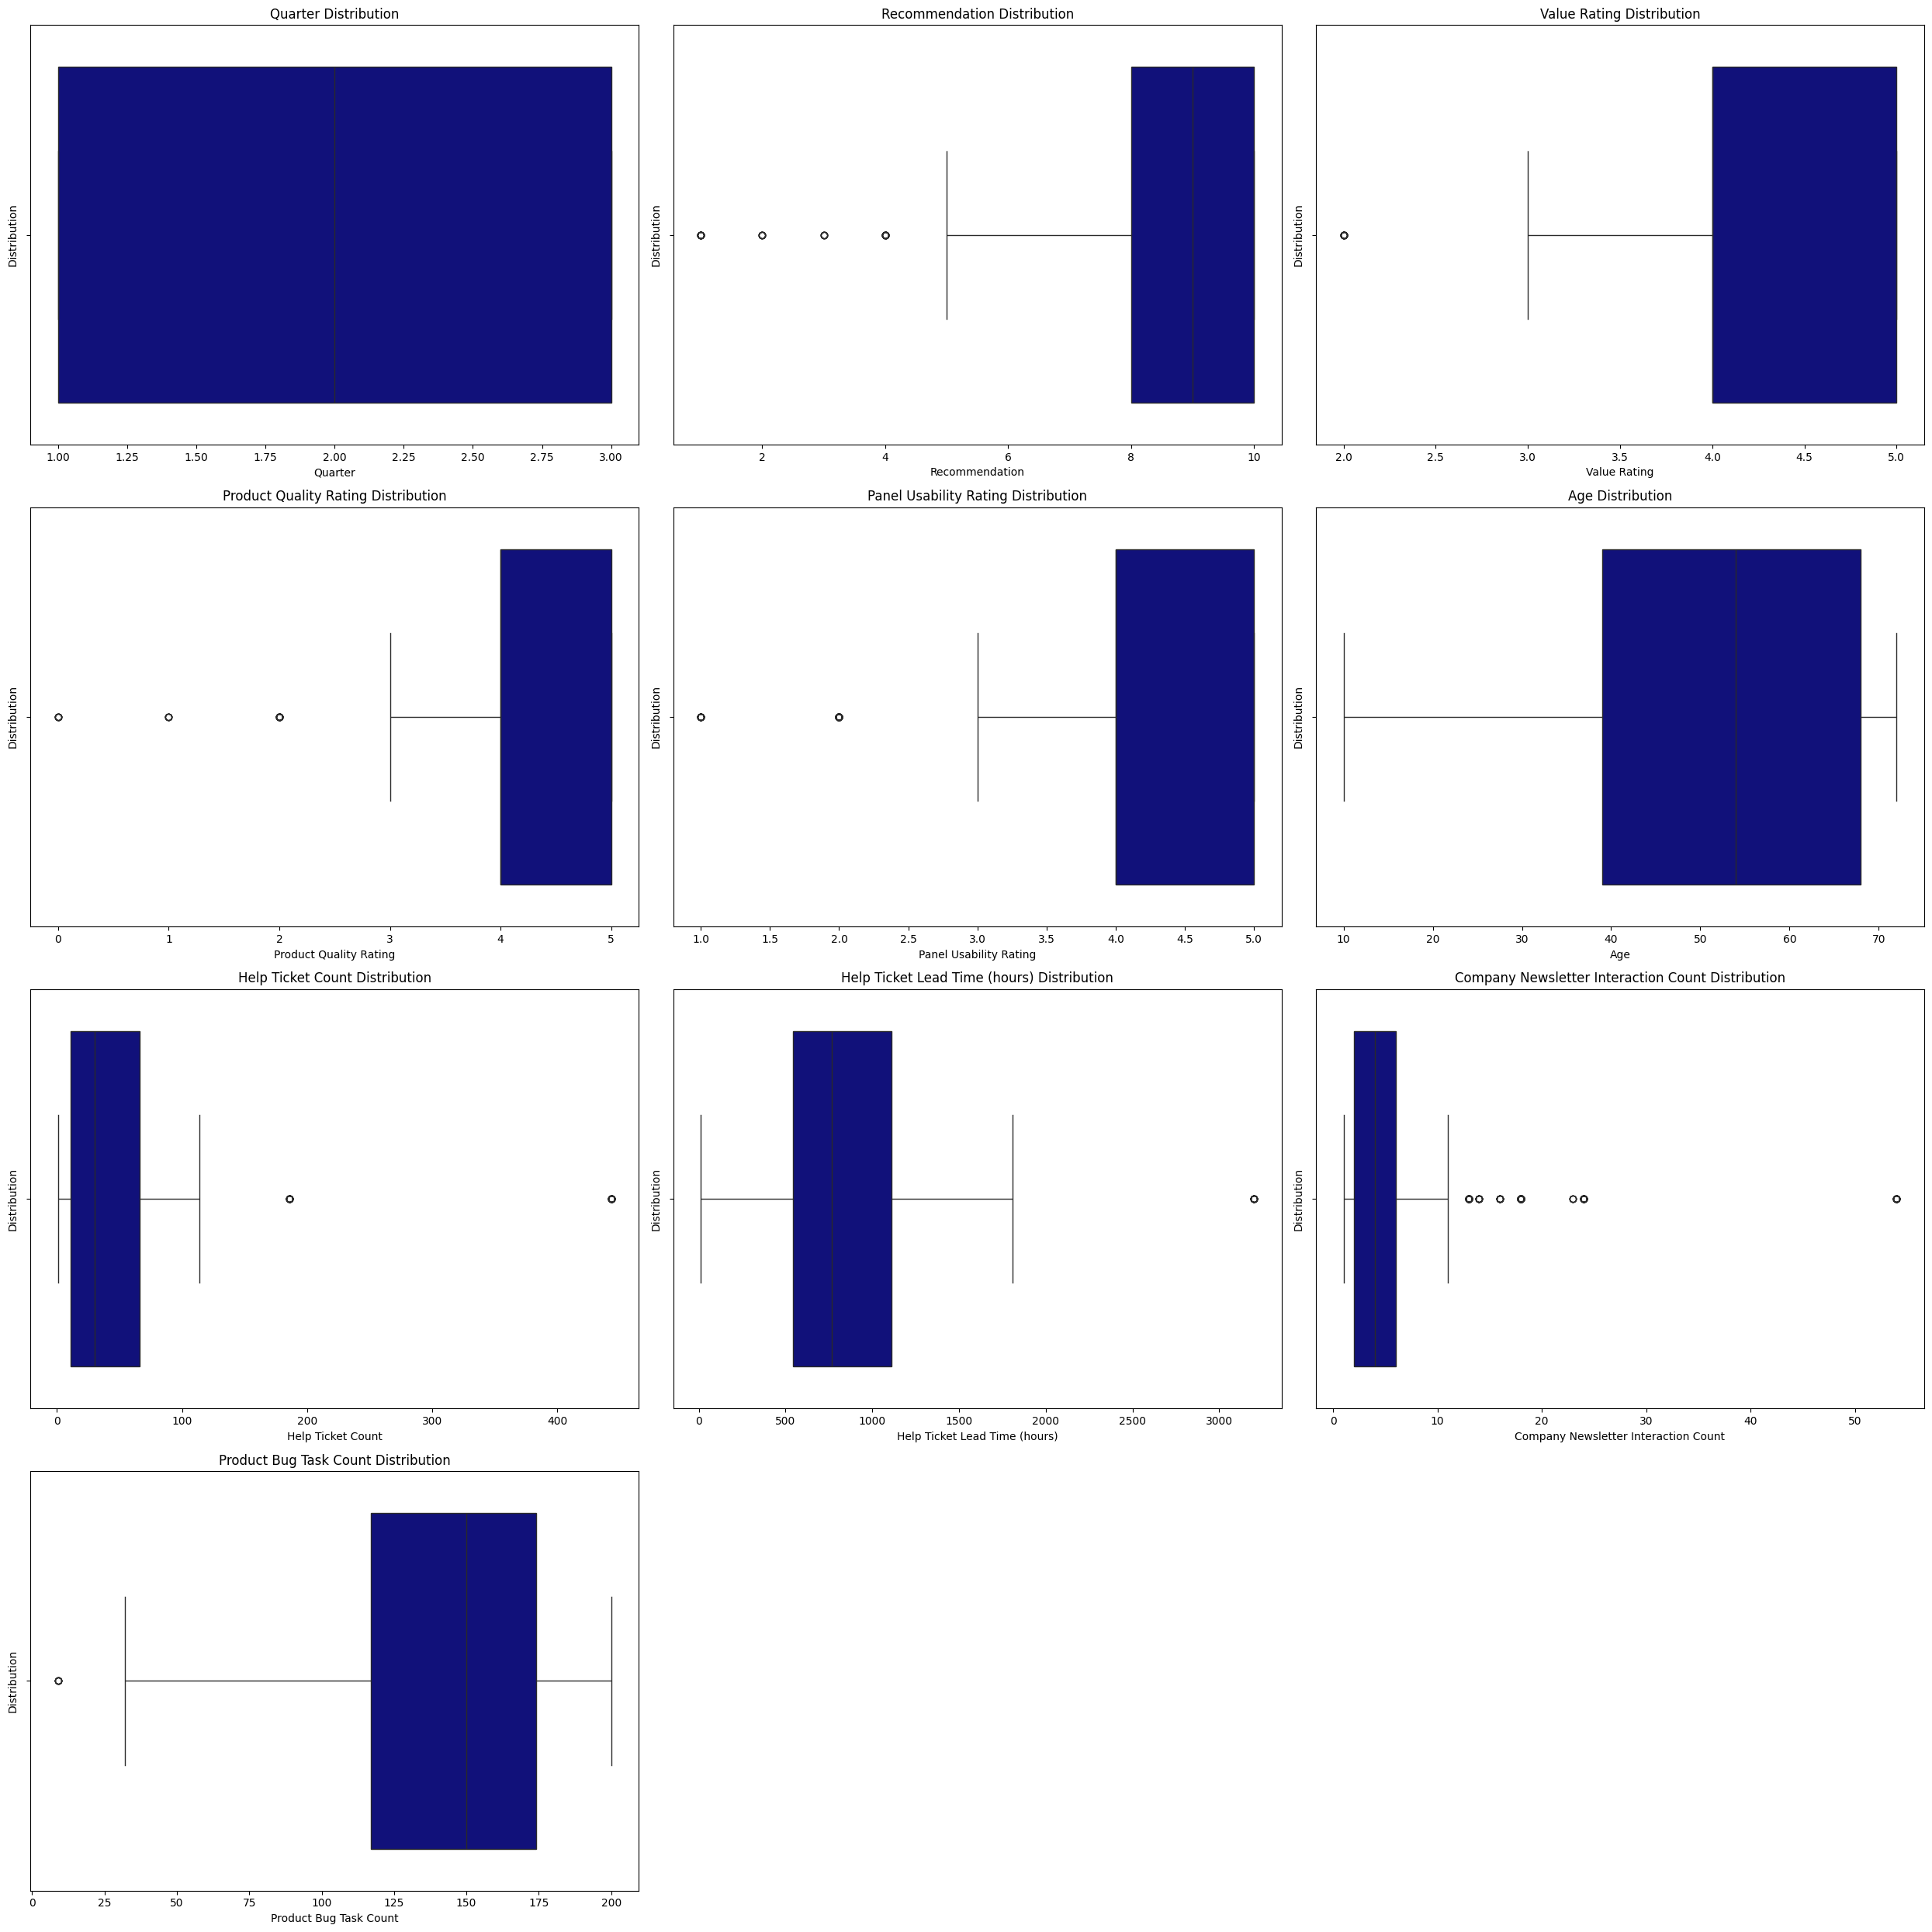

In [7]:
# Outliers boxplot
fig = plt.figure(figsize=(25, 25))
for i, col in enumerate(df_num.columns):
    ax = fig.add_subplot(4, 3, i+1)
    sns.boxplot(x = df_num[col].ffill(), color='darkblue')
    ax.set_title(col + " Distribution", color='k')
    plt.ylabel('Distribution')
fig.tight_layout()

In [8]:
# remove outliers with np.abs
from scipy import stats
df_num = df_num[(np.abs(stats.zscore(df_num)) < 3).all(axis=1)]

# shape 
df_num.shape

(1509, 10)

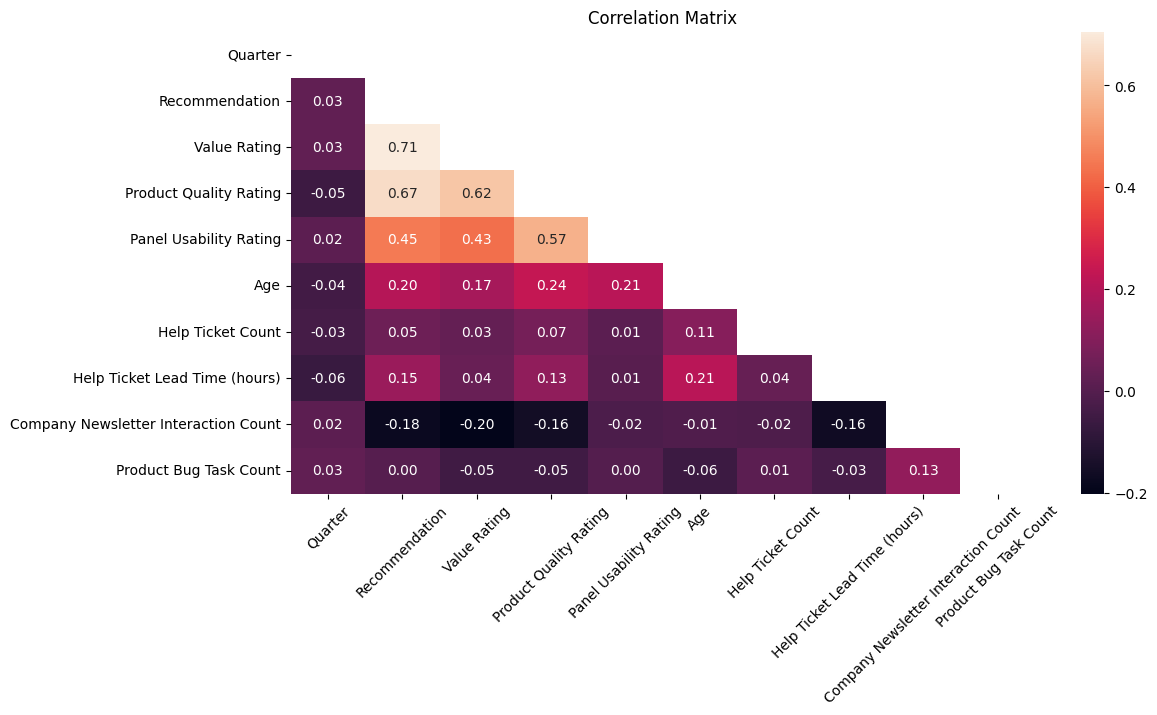

In [9]:
# correlation matrix
def sketch_corr(df):
    plt.figure(figsize=(12,6))
    mask = np.triu(df.corr())
    corr_matrix = df.corr()
    sns.heatmap(corr_matrix, annot=True, mask = mask, cmap='rocket', fmt=".2f")
    plt.title('Correlation Matrix')
    plt.xticks(rotation=45)
    plt.show()

sketch_corr(df_num)


['Once a Day' 'Once a Week' 'Once a Month']
How frequently are you using our platform
Once a Day      958
Once a Week     443
Once a Month    235
Name: count, dtype: int64


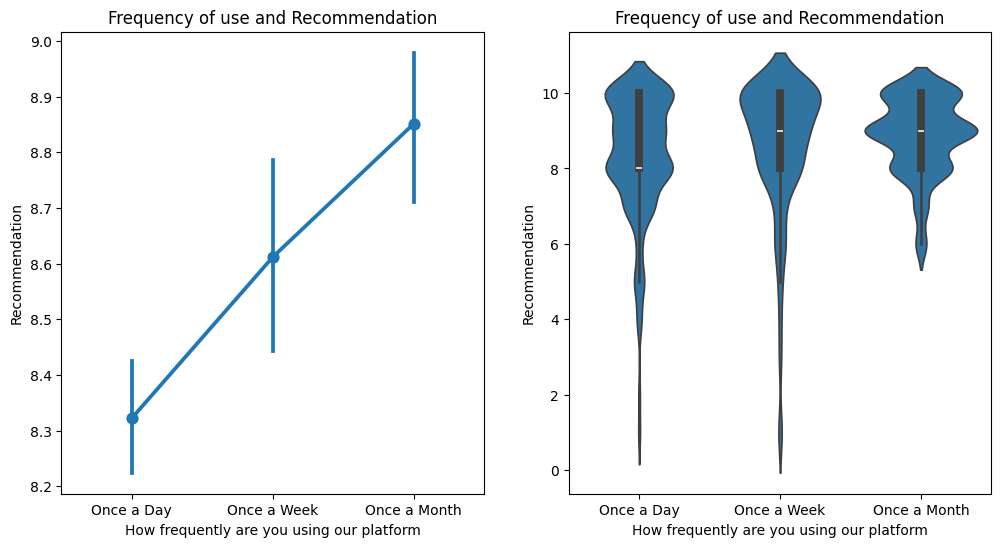

In [16]:
print(df['How frequently are you using our platform'].unique())
print(df['How frequently are you using our platform'].value_counts())

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].set_title('Frequency of use and Recommendation')
axes[1].set_title('Frequency of use and Recommendation')

# Pointplot
sns.pointplot(x="How frequently are you using our platform", 
            y="Recommendation", 
            data=df,
            ax=axes[0])

#Violinplot
sns.violinplot(x="How frequently are you using our platform", 
            y="Recommendation", 
            data=df,
            ax=axes[1])

plt.show()


In [11]:
df['Reporting Understanding'].unique()

array(['I need someone from Insider team to provide me the report from the panel',
       'I tried but could not find everything I need',
       'I am able to report everything easily',
       "I can pull all the numbers, but don't understand them",
       "I don't use it often"], dtype=object)

In [12]:
# Denenebilir 
feedbacks = {
    "I need someone from Insider team to provide me the report from the panel": 2,
    "I tried but could not find everything I need": 3,
    "I am able to report everything easily": 5,
    "I can pull all the numbers, but don't understand them": 3,
    "I don't use it often": 2
}